<a href="https://colab.research.google.com/github/zephyrroche/Netflix-Stock-Analysis/blob/main/Neflix_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Volume of Stock Traded
2. Netflix Stock Price - High, Open, Closed
3. Netflix Stock Price - Day, Month, Year Wise
4. Top 5 Dates with Highest Stock Price
5. Top 5 Dates with Lowest Stock Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Netflix.csv to Netflix.csv


In [3]:
df = pd.read_csv('Netflix.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [8]:
sns.set(rc={"figure.figsize" :(10,5)})

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


# **Volume of Stock Traded**

Text(0.5, 1.0, 'volume of stock versus time')

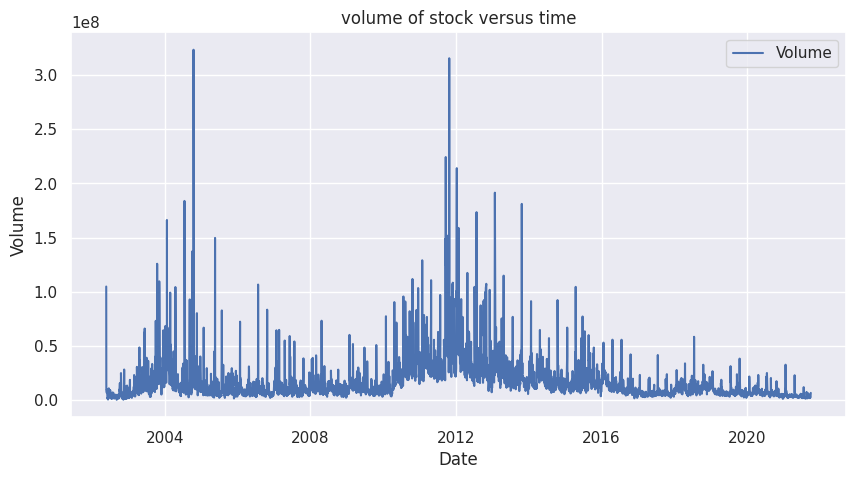

In [10]:
sns.lineplot(x=df.index, y=df['Volume'], label='Volume')
plt.title('volume of stock versus time')

# **Netflix Stock Price - High, Open, Closed**

<Axes: title={'center': 'Netflix Stock Price'}, xlabel='Date'>

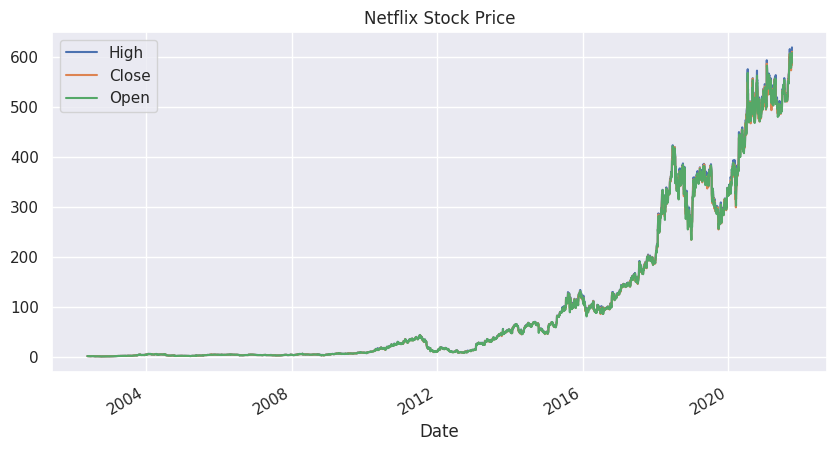

In [11]:
df.plot(y=['High','Close','Open'], title = 'Netflix Stock Price')

# **Netflix Stock Price - Day, Month, Year Wise**

<Axes: xlabel='Year'>

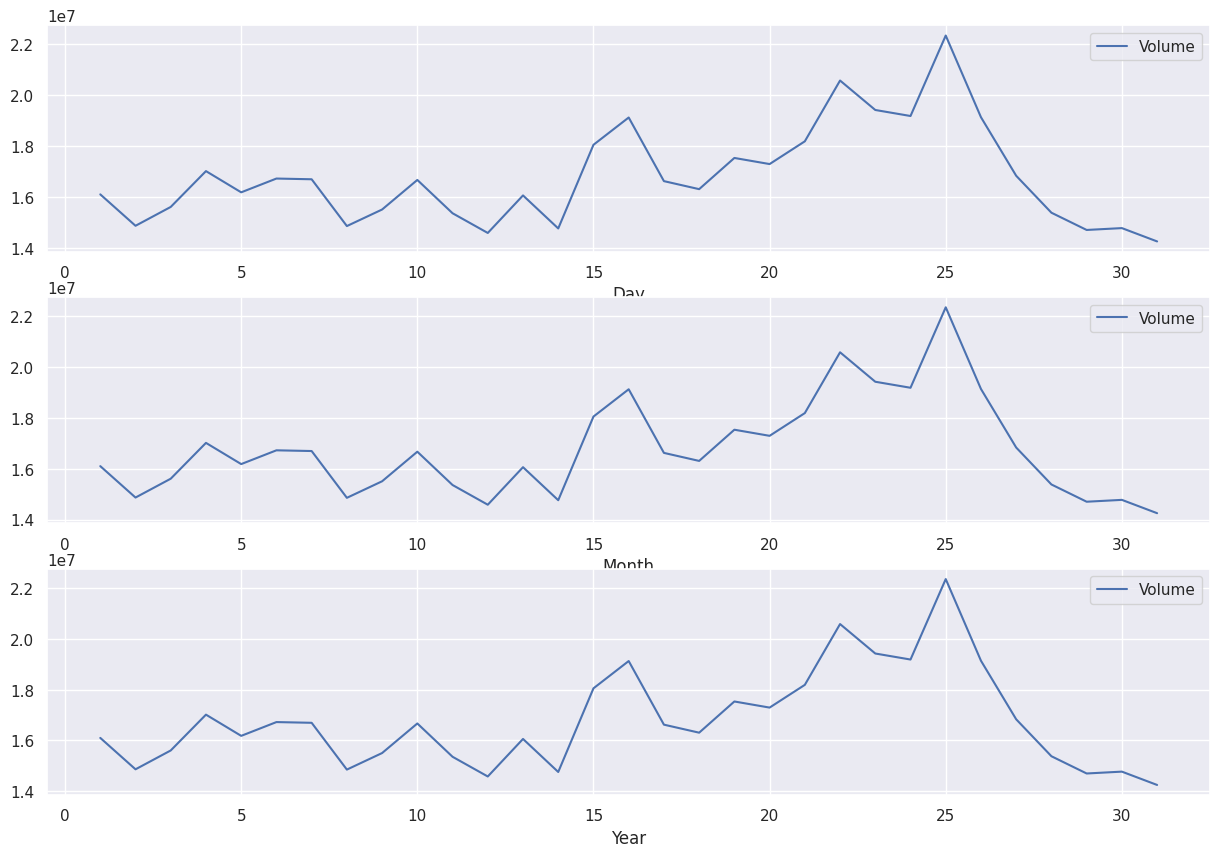

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (15,10))
df.groupby(df.index.day).mean().plot(y='Volume',ax=ax1,xlabel='Day')
df.groupby(df.index.day).mean().plot(y='Volume',ax=ax2, xlabel='Month')
df.groupby(df.index.day).mean().plot(y='Volume',ax=ax3, xlabel='Year')

In [22]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100


# **Top 5 Dates with Highest Stock Price**

In [23]:
a = df.sort_values(by = 'High', ascending = False).head(5)
a['High']

,High
Date,
2021-09-30,619.000000
2021-09-08,615.599976
2021-09-07,613.849976
2021-09-29,609.880005
2021-09-10,609.450012


# **Top 5 Dates with Lowest Stock Price**

In [25]:
b = df.sort_values(by = 'Low', ascending = True).head(5)
b['Low']

,Low
Date,
2002-10-10,0.346429
2002-10-09,0.347143
2002-10-07,0.382143
2002-10-08,0.390714
2002-10-16,0.442857


<Axes: xlabel='Date', ylabel='Low'>

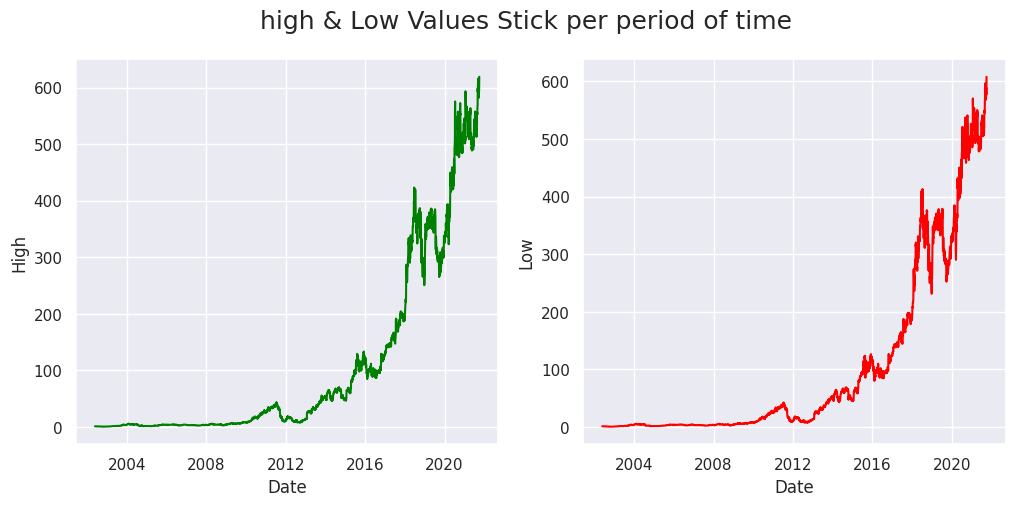

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,5))
fig.suptitle('high & Low Values Stick per period of time', fontsize = 18)
sns.lineplot(ax = axes[0], y = df['High'], x=df.index, color='green')
sns.lineplot(ax = axes[1], y=df['Low'], x=df.index, color='red')